In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys, os, re, time
import numpy as np
import cv2
import android



In [14]:
droide=android.Android()

In [12]:
!adb devices

List of devices attached
081081e1	device



In [7]:
!adb forward tcp:9999 tcp:47702

In [15]:
droide.ttsSpeak("aqui estoy")

Result(id=0, result=None, error=None)

In [16]:
delay = droide.dialogGetInput('Entrada 1', 'Demora antes de iniciar?','5').result

numOfShots = droide.dialogGetInput('Entrada 2', 'Total de imagenes a capturar?', '10').result

delayBetweenShots = droide.dialogGetInput('Entrada 3','Demora (segs) entre capturas','2').result

In [17]:
droide.ttsSpeak('Tomando fotos en' + delay + 'segundos')
time.sleep(int(delay))

counter = 1
droide.ttsSpeak('Tomando foto')

while counter <= int(numOfShots):
    droide.cameraCapturePicture('/sdcard/DCIM/CAMERA/SENSOR/foto_'+str(counter)+'.jpg',1,1)
    counter +=1
    if counter != int(numOfShots):
        time.sleep(int(delayBetweenShots))
        
print 'Hecho sin errores...'

droide.ttsSpeak('Terminado sin errores...')
#del droide

Hecho sin errores...


Result(id=16, result=None, error=None)

In [97]:
!adb pull /sdcard/DCIM/CAMERA/SENSOR/ ./

pull: building file list...
pull: /sdcard/DCIM/CAMERA/SENSOR/foto_10.jpg -> ./foto_10.jpg
pull: /sdcard/DCIM/CAMERA/SENSOR/foto_9.jpg -> ./foto_9.jpg
pull: /sdcard/DCIM/CAMERA/SENSOR/foto_8.jpg -> ./foto_8.jpg
pull: /sdcard/DCIM/CAMERA/SENSOR/foto_7.jpg -> ./foto_7.jpg
pull: /sdcard/DCIM/CAMERA/SENSOR/foto_6.jpg -> ./foto_6.jpg
pull: /sdcard/DCIM/CAMERA/SENSOR/foto_5.jpg -> ./foto_5.jpg
pull: /sdcard/DCIM/CAMERA/SENSOR/foto_4.jpg -> ./foto_4.jpg
pull: /sdcard/DCIM/CAMERA/SENSOR/foto_3.jpg -> ./foto_3.jpg
pull: /sdcard/DCIM/CAMERA/SENSOR/foto_2.jpg -> ./foto_2.jpg
pull: /sdcard/DCIM/CAMERA/SENSOR/foto_1.jpg -> ./foto_1.jpg
10 files pulled. 0 files skipped.
3664 KB/s (9048022 bytes in 2.411s)


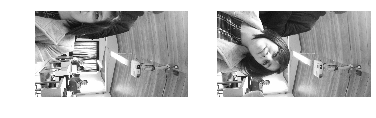

3437.86943335
hubo movimiento


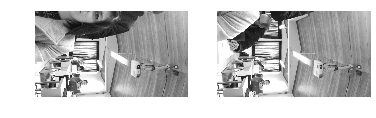

2207.37991223
hubo movimiento


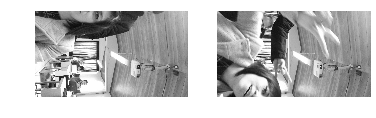

4231.89072772
hubo movimiento


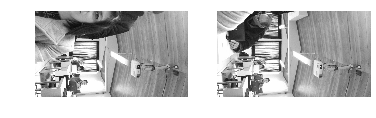

2530.51433353
hubo movimiento


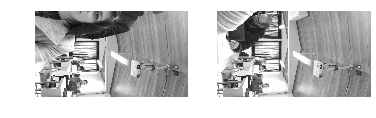

2435.18496624
hubo movimiento


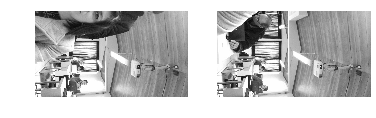

2435.41521508
hubo movimiento


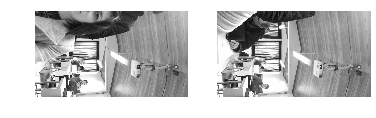

2508.97124807
hubo movimiento


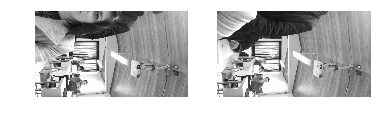

1867.36250868
hubo movimiento


In [121]:
droide.ttsSpeak('Empezando comparacion')
counter = 1
pic = os.path.join('.','foto_'+str(counter)+'.jpg')
img = cv2.imread(pic, 0)
counter +=1
while counter <= int(numOfShots)-1:
       
    #segunda imagen
    pic2 = os.path.join('.','foto_'+str(counter) +'.jpg')
    img2 = cv2.imread(pic2, 0)
    
    compare_images(img,img2,'titulo')
    valor = mse(img,img2)
    if valor>1000 :
        print 'hubo movimiento'
        droide.ttsSpeak('hubo movimiento')
        
    counter +=1
    
            

In [49]:
!dir

 El volumen de la unidad C es TI10653300C
 El n£mero de serie del volumen es: 7857-9C58

 Directorio de C:\Users\Anny\Documents\GitHub\lania.ipython\Dia3\notebooks

14/11/2015  11:07 a. m.    <DIR>          .
14/11/2015  11:07 a. m.    <DIR>          ..
14/11/2015  09:39 a. m.    <DIR>          .ipynb_checkpoints
31/10/2015  10:26 a. m.            10,471 01_Adquiriendo_Datos_imagenes.ipynb
31/10/2015  10:26 a. m.            21,643 02_Distribuyendo_Datos_imagenes.ipynb
31/10/2015  10:26 a. m.         1,468,497 03_Procesando_Datos_imagenes.ipynb
31/10/2015  10:26 a. m.           260,110 04_Adquiriendo_Datos_GPS.ipynb
31/10/2015  10:26 a. m.            98,504 05_Adquiriendo_Datos_Accel-Copy0.ipynb
31/10/2015  10:26 a. m.            59,756 05_Adquiriendo_Datos_Accel.ipynb
14/11/2015  11:07 a. m.            16,493 Untitled.ipynb
               7 archivos      1,935,474 bytes
               3 dirs  355,589,066,752 bytes libres


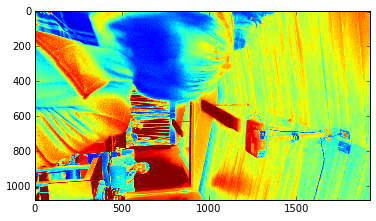

In [112]:
pic = os.path.join('.','foto_10.jpg')

img = cv2.imread(pic, 0)

#gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img)

In [84]:
r,c = img.shape
print r,c

1080 1920


In [53]:
M = cv2.getRotationMatrix2D((c/2,r/2),270,1)

In [58]:
dst= cv2.warpAffine(img, M, (c,r))

In [ ]:
plt.imshow(dst)

# Para comparar la imagen

In [109]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err
 
def compare_images(imageA, imageB, title):
	# compute the mean squared error and structural similarity
	# index for the images
	m = mse(imageA, imageB)
   	# s = ssim(imageA, imageB)
 
	# setup the figure
	fig = plt.figure(title)
	#plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
 
	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap = plt.cm.gray)
	plt.axis("off")
 
	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	plt.axis("off")
 
	# show the images
	plt.show()
	print m
    
    

In [110]:
compare_images(img,img,'titulo')

AttributeError: 'NoneType' object has no attribute 'astype'

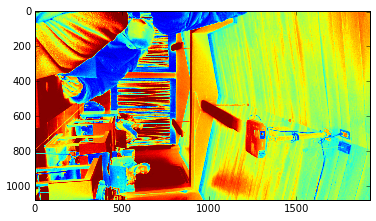

In [113]:
pic2 = os.path.join('.','foto_3.jpg')

img2 = cv2.imread(pic2, 0)
plt.imshow(img2)

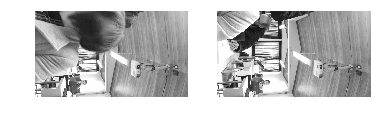

2947.08103443


In [114]:
compare_images(img,img2,'titulo')